## Trabalho 1


$f(x) = (4−2.1x_{1}^2+\frac{1}{3}x_{1}^4)x_{1}^2 + x_{1}x_{2} −4(1−x_{2}^2)x_{2}^2$

In [88]:
from sympy import *
init_printing(use_unicode=True)
x, y = symbols('x y') #define x e y como variáveis simbólicas.
def f(x,y): return (4-2.1*(x**2) + (1/3)*(x**4))*(x**2) + x*y -4*(1-(y**2))*(y**2);
f(x,y)

In [74]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


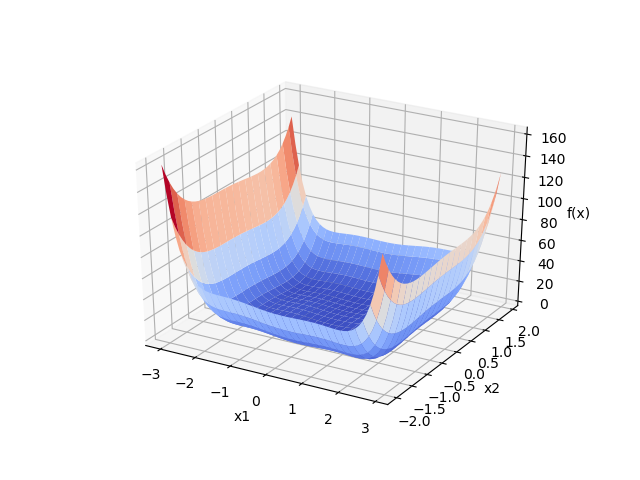

In [75]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = meshgrid(x,y)
Z = f(X,Y)
# x = X.flatten()
# y = Y.flatten()

fig = plt.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
               linewidth=1, antialiased=True)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f(x)');

### Análise do gráfico

Como mostrado na figura a cima o gráfico da função $f(x)$ cresce rapidamente quando $x_{1} > 2.5$ ou $x_{1} < -2.5$ e
quando $x_{2} > 1.5$ ou $x_{2} < -1.5$.

Dessa forma iremos nos consentrar em analizar o centro da função. Vamos plotar o gráfico no intervalo $x_{1} \in \{-2, 2\}$ e $x_{2} \in \{-1.25, 1.25\}$ para melhor visualizar as características da função nesse intervalo.

<IPython.core.display.Javascript object>


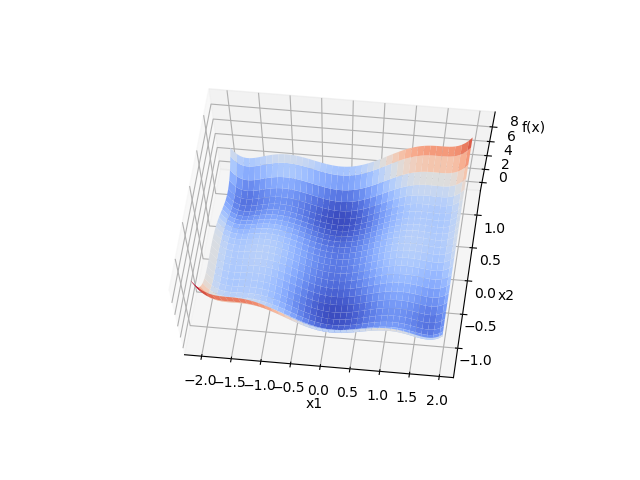

In [76]:
x = np.arange(-2, 2, 0.05)
y = np.arange(-1.25, 1.25, 0.05)

X, Y = meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
               linewidth=1, antialiased=True)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f(x)');

In [136]:
f(0,0)

Podemos ver que a função varia seu valor entre mais ou menos $[-1,10]$ e possui 4 partes baixas, sendo 2 maiores por volta de $x_{1} = 0$ formando uma imagem parecida com um $8$ e as duas menores por volta de $[x_{1},x_{2}] = [1.75,-0.75]$ e $[x_{1},x_{2}] = [-1.75,0.75]$.

O centro do $8$ presente na função é exatamente o ponto $[0,0]$ onde $f([0,0]) = 0$.

### Calculando Gradiente ($D$) e Matrix Heissiana ($H$) de $f$

In [115]:
# def f(x,y): return (4-2.1*(x**2) + (1/3)*(x**4))*(x**2) + x*y -4*(1-(y**2))*(y**2);
def D(xl,yl): return [diff(f(x,y),x).subs(x,xl).subs(y,yl),
                    diff(f(x,y),y).subs(x,xl).subs(y,yl)];

In [137]:
def H(xl,yl): return [[diff(diff(f(x,y),x),x).subs(x,xl).subs(y,yl), diff(diff(f(x,y),x),y).subs(x,xl).subs(y,yl)],
                      [diff(diff(f(x,y),y),x).subs(x,xl).subs(y,yl), diff(diff(f(x,y),y),y).subs(x,xl).subs(y,yl)]];

H(0,0)